In [ ]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from tensorflow.keras.utils import to_categorical

from kneed import KneeLocator

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT.csv")

In [ ]:
data_male = data[data['Gender']=='Male']
data_male

,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?
0,Male,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
1,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
2,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly
3,Male,Class of 2025,I am introverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible
4,Male,Class of 2025,I am extroverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
...,...,...,...,...,...,...,...,...
494,Male,Class of 2026,I am extroverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind","I see more than just one ,I have about 20% of ..."
497,Male,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,Nope!,Friendly
499,Male,Class of 2026,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized
503,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly


In [ ]:
#Converting these records into one hot  vectors
cols = ["Year Group","How would you describe your personality?",
        "What time do you typically go to bed on weeknights?",
        "Where do you prefer to do homework/study?","What do you enjoy doing for fun?",
        "Do you enjoy having friends over in your room?","How would your friends describe you in one word?"]

col_trans = ColumnTransformer(transformers=[('trans',OneHotEncoder(),cols)])

one_hot_male_data = col_trans.fit_transform(data_male)

new_cols = list(col_trans.named_transformers_['trans'].get_feature_names_out(cols))
# print(new_cols)

one_hot_male_data.shape
one_hot_male = pd.DataFrame(one_hot_male_data.toarray(), columns=new_cols)
one_hot_male


,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),...,"Do you enjoy having friends over in your room?_Yup, all the time","Do you enjoy having friends over in your room?_Yup, but not always",How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Excellent,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,"How would your friends describe you in one word?_I see more than just one ,I have about 20% of everything there",How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Reserved,How would your friends describe you in one word?_Responsible
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
208,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
210,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Creating the priority matrix for the male_category
rows=one_hot_male.shape[0]
columns = one_hot_male.shape[1]
origional_cat_options = [4,3,3,2,3,4,8]

priority_mat_male = np.zeros((rows,columns))
np.random.seed(42)

for i in range(rows):
  start = 0

  for group in origional_cat_options:
    rand_value = np.random.randint(1,11)
    priority_mat_male[i,start:start+group]=rand_value

    start+=group

priority_mat_male


array([[ 7.,  7.,  7., ...,  3.,  3.,  3.],
       [ 7.,  7.,  7., ...,  3.,  3.,  3.],
       [ 6.,  6.,  6., ...,  5.,  5.,  5.],
       ...,
       [ 8.,  8.,  8., ...,  4.,  4.,  4.],
       [ 6.,  6.,  6., ...,  7.,  7.,  7.],
       [10., 10., 10., ...,  2.,  2.,  2.]])

In [ ]:
#multiplying the priorities with the one_hot_encoded data to form weighted vectors for each individual (record)

priority_data_male = one_hot_male*priority_mat_male
priority_data_male

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),...,"Do you enjoy having friends over in your room?_Yup, all the time","Do you enjoy having friends over in your room?_Yup, but not always",How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Excellent,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,"How would your friends describe you in one word?_I see more than just one ,I have about 20% of everything there",How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Reserved,How would your friends describe you in one word?_Responsible
0,0.0,0.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,8.0,...,0.0,10.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,7.0,0.0,0.0,8.0,0.0,5.0,0.0,...,0.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,9.0,0.0,...,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
208,0.0,0.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
210,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,5.0,0.0,...,0.0,3.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_female = data[data['Gender']=='Female']
data_female

,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?
6,Female,Class of 2025,Somewhere in between,After Midnight (12AM),In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly
9,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
10,Female,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible
13,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Hanging out with friends,"Yup, all the time",Chill
14,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Fun
...,...,...,...,...,...,...,...,...
496,Female,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,Nope!,Friendly
498,Female,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized
500,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Responsible
501,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),Away from the room,Hanging out with friends,"Yup, but not always",Organized


In [ ]:
cols = ["Year Group","How would you describe your personality?",
        "What time do you typically go to bed on weeknights?",
        "Where do you prefer to do homework/study?","What do you enjoy doing for fun?",
        "Do you enjoy having friends over in your room?","How would your friends describe you in one word?"]

col_trans = ColumnTransformer(transformers=[('trans',OneHotEncoder(),cols)])

one_hot_female_data = col_trans.fit_transform(data_female)

new_cols = list(col_trans.named_transformers_['trans'].get_feature_names_out(cols))
# print(new_cols)

one_hot_female_data.shape
one_hot_female = pd.DataFrame(one_hot_female_data.toarray(), columns=new_cols)
one_hot_female

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,Year Group_class of 2024,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),...,How would your friends describe you in one word?_All the above mentioned,How would your friends describe you in one word?_Calm,How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,How would your friends describe you in one word?_No idea,How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Responsible,How would your friends describe you in one word?_Unsociable,"How would your friends describe you in one word?_fun, responsible and organized"
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
291,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#Correcting the entries
one_hot_female["Year Group_Class of 2024"] = one_hot_female["Year Group_Class of 2024"]+one_hot_female["Year Group_class of 2024"]
one_hot_female = one_hot_female.drop(["Year Group_class of 2024"],axis = 1)

In [ ]:
rows=one_hot_female.shape[0]
columns = one_hot_female.shape[1]
origional_cat_options = [4,3,3,2,3,4,10]

priority_mat_female = np.zeros((rows,columns))

np.random.seed(51)
for i in range(rows):
  start = 0

  for group in origional_cat_options:
    rand_value = np.random.randint(1,11)
    priority_mat_female[i,start:start+group]=rand_value

    start+=group

priority_mat_female

array([[10., 10., 10., ...,  6.,  6.,  6.],
       [ 5.,  5.,  5., ...,  4.,  4.,  4.],
       [ 7.,  7.,  7., ...,  8.,  8.,  8.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [10., 10., 10., ..., 10., 10., 10.],
       [ 4.,  4.,  4., ...,  8.,  8.,  8.]])

In [ ]:
priority_data_female = one_hot_female*priority_mat_female
priority_data_female

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),...,How would your friends describe you in one word?_All the above mentioned,How would your friends describe you in one word?_Calm,How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,How would your friends describe you in one word?_No idea,How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Responsible,How would your friends describe you in one word?_Unsociable,"How would your friends describe you in one word?_fun, responsible and organized"
0,0.0,10.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,5.0,0.0,0.0,10.0,0.0,0.0,6.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,9.0,0.0,0.0,0.0,9.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0,7.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
290,0.0,0.0,0.0,1.0,0.0,0.0,5.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
291,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [ ]:
encoder = OrdinalEncoder()
encoded_data_male =encoder.fit_transform(data_male)
encoded_data_female =encoder.fit_transform(data_female)
distance_matrix_male = pairwise_distances(encoded_data_male,metric='hamming')
distance_matrix_female = pairwise_distances(encoded_data_female,metric='hamming')

In [ ]:
male_cluster_cost = []
female_cluster_cost = []
m_Sscore = []
f_Sscore = []
s_values = []
count = 2

for i in  range(2,100):
  kmodes = KModes(n_clusters = i,init='Huang', max_iter = 300, random_state=42,verbose = 1)
  clusters_male = kmodes.fit_predict(data_male)
  male_cluster_cost.append(kmodes.cost_)

  clusters_female = kmodes.fit_predict(data_female)
  female_cluster_cost.append(kmodes.cost_)

  score_male = silhouette_score(distance_matrix_male,clusters_male,metric="precomputed")
  score_female = silhouette_score(distance_matrix_female,clusters_female,metric="precomputed")

  m_Sscore.append(score_male)
  f_Sscore.append(score_female)
  s_values.append(count)
  count+=1

Streaming output truncated to the last 5000 lines.
Run 9, iteration: 2/300, moves: 3, cost: 207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 10, iteration: 1/300, moves: 40, cost: 186.0
Run 10, iteration: 2/300, moves: 2, cost: 186.0
Best run was number 10
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 35, cost: 272.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/300, moves: 54, cost: 263.0
Run 2, iteration: 2/300, moves: 2, cost: 263.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/300, moves: 37, cost: 279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/300, moves: 22, cost: 284.0
Run 4, iteration: 2/300, moves: 6, cost: 284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration

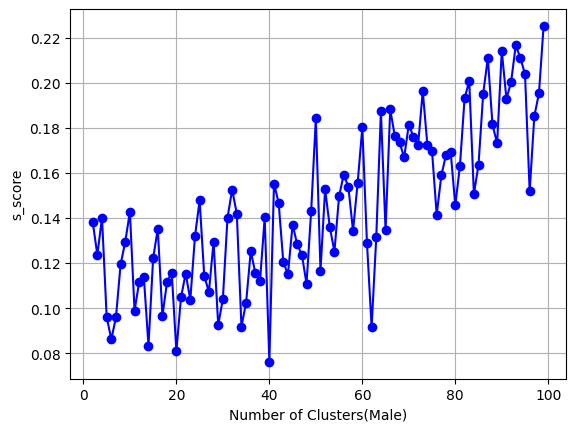

In [ ]:
plt.plot(s_values,m_Sscore,'o-',color = 'blue')
plt.xlabel('Number of Clusters(Male)')
plt.ylabel('s_score')
plt.grid()
plt.show()

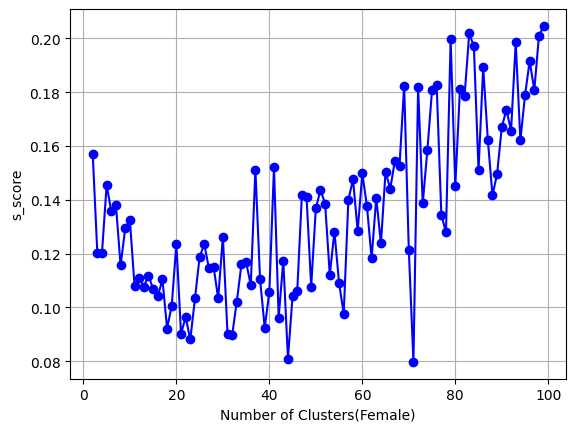

In [ ]:
plt.plot(s_values,f_Sscore,'o-',color = 'blue')
plt.xlabel('Number of Clusters(Female)')
plt.ylabel('s_score')
plt.grid()
plt.show()

Best number of clusters (elbow method): 16


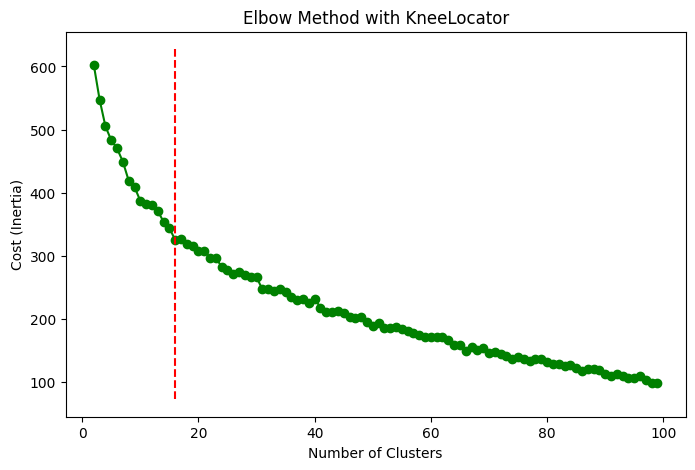

In [ ]:
male_knee = KneeLocator(s_values, male_cluster_cost, curve="convex", direction="decreasing")
male_centroids = male_knee.knee
print(f"Best number of clusters (elbow method): {male_centroids}")

plt.figure(figsize=(8,5))
plt.plot(s_values, male_cluster_cost, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method with KneeLocator')
plt.vlines(male_centroids, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

Best number of clusters (elbow method): 17


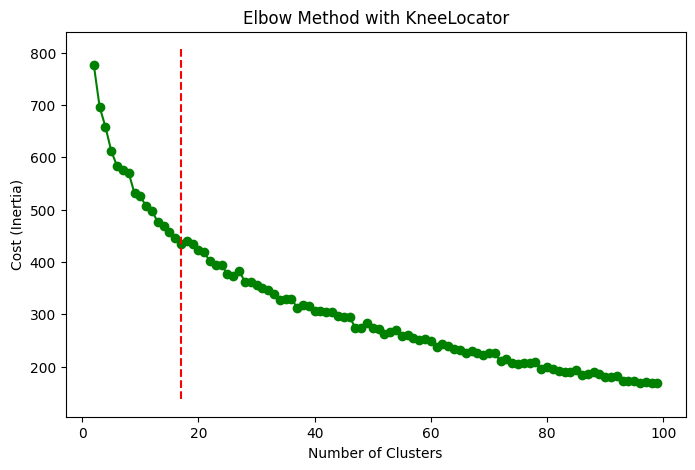

In [ ]:
female_knee = KneeLocator(s_values, female_cluster_cost, curve="convex", direction="decreasing")
female_centroids = female_knee.knee
print(f"Best number of clusters (elbow method): {female_centroids}")

plt.figure(figsize=(8,5))
plt.plot(s_values, female_cluster_cost, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method with KneeLocator')
plt.vlines(female_centroids, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

In [ ]:
kmodes = KModes(n_clusters = male_centroids, max_iter = 300, random_state=42,verbose = 1)
male_clusters = kmodes.fit_predict(data_male)
data_male['cluster'] = male_clusters
one_hot_male['cluster'] = male_clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 33, cost: 347.0
Run 1, iteration: 2/300, moves: 2, cost: 347.0


<ipython-input-363-92f91758400d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_male['cluster'] = male_clusters


In [ ]:
kmodes = KModes(n_clusters = female_centroids, max_iter = 300, random_state=42,verbose = 1)
female_clusters = kmodes.fit_predict(data_female)
data_female['cluster'] = female_clusters
one_hot_female['cluster'] = female_clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 45, cost: 430.0
Run 1, iteration: 2/300, moves: 0, cost: 430.0


<ipython-input-364-346239c1eb89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_female['cluster'] = female_clusters


In [ ]:
data_male[data_male['cluster']==0]

,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?,cluster
1,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0
25,Male,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, all the time",Chill,0
74,Male,Class of 2025,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Organized,0
76,Male,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,Nope!,Responsible,0
85,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Excellent,0
110,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly,0
114,Male,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Chill,0
125,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Organized,0
183,Male,Class of 2025,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Chill,0
192,Male,Class of 2027,I am introverted,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Chill,0


In [ ]:
data_female[data_female['cluster']==0]

,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?,cluster
9,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0
22,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Hanging out with friends,"Yup, but not always",Organized,0
34,Female,Class of 2025,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0
41,Female,Class of 2025,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0
43,Female,Class of 2025,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0
...,...,...,...,...,...,...,...,...,...
439,Female,Class of 2027,I am extroverted,Between 10PM and Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly,0
463,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible,0
479,Female,Class of 2025,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Organized,0
481,Female,Class of 2025,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0


In [ ]:
group = 0
student = 0

wanted_one_hot_data = one_hot_female[one_hot_female['cluster']==group]

similarity_matrix = cosine_similarity(wanted_one_hot_data)
np.fill_diagonal(similarity_matrix, 0)
compatibility =[]


for i in range(similarity_matrix[student].shape[0]):
  compatibility.append(similarity_matrix[student][i]*100)
  if i != student:
    print(f"student {student} is {similarity_matrix[student][i]*100:.2f} % compatible with student {i}")

student 0 is 57.14 % compatible with student 1
student 0 is 85.71 % compatible with student 2
student 0 is 71.43 % compatible with student 3
student 0 is 85.71 % compatible with student 4
student 0 is 85.71 % compatible with student 5
student 0 is 71.43 % compatible with student 6
student 0 is 85.71 % compatible with student 7
student 0 is 85.71 % compatible with student 8
student 0 is 85.71 % compatible with student 9
student 0 is 85.71 % compatible with student 10
student 0 is 85.71 % compatible with student 11
student 0 is 85.71 % compatible with student 12
student 0 is 71.43 % compatible with student 13
student 0 is 71.43 % compatible with student 14
student 0 is 71.43 % compatible with student 15
student 0 is 57.14 % compatible with student 16
student 0 is 85.71 % compatible with student 17
student 0 is 85.71 % compatible with student 18
student 0 is 85.71 % compatible with student 19
student 0 is 85.71 % compatible with student 20
student 0 is 71.43 % compatible with student 21
s

In [381]:
wanted_data = data_female[data_female['cluster']==group].copy()
wanted_data["Compatibility (%)"] = compatibility

wanted_data.sort_values(by='Compatibility (%)',ascending=False,inplace=True)
wanted_data


,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?,cluster,Compatibility (%)
237,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0,100.000000
301,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0,100.000000
357,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0,100.000000
424,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0,100.000000
43,Female,Class of 2025,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0,85.714286
...,...,...,...,...,...,...,...,...,...,...
22,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Hanging out with friends,"Yup, but not always",Organized,0,57.142857
358,Female,Class of 2027,I am extroverted,Between 10PM and Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, all the time",Friendly,0,57.142857
312,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Hanging out with friends,"Yup, but not always",Responsible,0,57.142857
500,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Responsible,0,57.142857
